# Imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importing the nn module implemented in the assignment
from nn.model import Sequential
from nn.layers import Dense, Input, Dropout
from nn.utils import one_hot

plt.rcParams['figure.figsize'] = (10.0, 7.0)
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "Serif"

In [2]:
DATA_DIR = os.path.join(os.getcwd(), 'data')
SAVE_DIR = os.path.join(os.getcwd(), 'plots')

# Introduction

This notebook shows how to use the module `nn` to build, compile and train a neural network. The module `nn` is a high-level API that provides a convenient way to build neural networks. The API of the module is very similar to that of the `keras` or `tensorflow` modules. The module uses automatic differentiation to compute the gradients of the loss function with respect to the parameters of the network.

Before we can start, let's load a dataset to work with. We'll use the same dataset given in the assignment, the fashion MNIST dataset.

## Loading Data

We start the exercise by first loading the dataset. 

In [3]:
#  training data stored in arrays X, y
data = pd.read_csv(os.path.join(DATA_DIR,'fashion-mnist_train.csv'))
X,y = data.iloc[:, 1:].values, data.iloc[:, 0].ravel()
m, nx = X.shape
print("Number of training examples: ", m)
print("Number of features: ", nx)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

Number of training examples:  10000
Number of features:  784
X shape:  (10000, 784)
y shape:  (10000,)


## Preprocessing

We'll normalize the data by dividing with 255.0. This will make the data range between 0 and 1.

In [4]:
X = X/255.0
X = X.T
y = one_hot(y, 10)

print(X.shape)
print(y.shape)

(784, 10000)
(10, 10000)


Great! Now we have the train and test data ready.

## Some Constraints

The module puts a resctriction on how the inputs can be given to it. The module assumes that the input data is such that its shape is `(n_x, m)`, where `n_x` is the number of features and `m` is the number of examples. This means that the input data should be a matrix, where each column is an example. The module also assumes that the labels are given as a one-hot encoded matrix, where each column is a label. The shape of the label matrix should be `(n_y, m)`, where `n_y` is the number of classes. This means even if you have a single label, it should be given as a matrix with shape `(1, m)`. You there are more than one labels, you have to pass one-hot encoded labels. This can be done using the `one_hot` function in the `utils` module. See the above cell for an example.

# The API

Let's start with the API.

As I mentioned earlier, the API of the module `nn` is very similar to that of the `keras` or `tensorflow`. So, training a neural network model comprises of three steps:

1. Define the model
2. Compile the model
3. Fit the model

Finally, we can use the model to make predictions.

## Define the model

A `model` can be defined using the `Sequential` class. The `Sequential` class is a container that holds the layers of the model. The layers are added to the model sequentially. The model is defined by using the `add` method of the `Sequential` class. The `add` method takes a layer as an argument. The layers are added to the model sequentially. The first layer added to the model is the input layer. The last layer added to the model is the output layer. The layers in between are the hidden layers.

Let's create an empty model. The `Sequential` class takes a `name` argument. The `name` argument is optional. If you don't provide a name, the model will be named `Sequential`.

In [5]:
model = Sequential(name='My Model')

You can see the layers of the model using the `layers` attribute of the model. The `layers` attribute is a list of layers.

In [6]:
model.layers

[]

Since the model is empty, the list of layers is empty.

### Adding layers

#### Input layer

The first layer added must be an `Input` layer. This way, you can use the `compile` method to see the architecture of the model created. The `Input` layers takes just two arguments: `input_shape` and `name`. The `input_shape` argument is a `tuple` that specifies the shape of the input data. The `name` argument is a string that specifies the name of the input layer. The `name` argument is optional.

In [7]:
input_layer = Input(input_shape=(784,), name='Input Layer')

Let's add this to the model.

In [8]:
model.add(input_layer)
model.layers

[Input((784,))]

So, we have a model with one layer, the `Input` layer. Next, we start adding hidden layer.

Instead of creating a `layer` object and then adding it to the model, we can also add the layer directly to the model like

```python
model.add(Dense(128, activation='relu', name='dense_1'))
```

#### Dense layer

A `Dense` layer has more attributes then the `Input` layer. The `Dense` layer takes the following arguments:

1. `neurons`: The number of neurons in the layer
2. `activation`: The activation function of the layer
3. `name`: The name of the layer
4. `l1`: The L1 regularization parameter
5. `l2`: The L2 regularization parameter

Let's add a `Dense` layer with 100 `neurons`, `relu` activation and `l1` regularization to the model.

In [9]:
model.add(Dense(neurons=100, activation='relu', name='Hidden Layer 1', l1=0.001))

Let's add another layer followed by `Dropout` layer and then output layer.

In [10]:
model.add(Dense(neurons=50, activation='relu', name='Hidden Layer 2', l1=0.001))
model.add(Dropout(0.2, name='Dropout Layer 1'))
model.add(Dense(neurons=10, activation='softmax', name='Output Layer'))

Since this is a multi-class classification problem, we'll use `softmax` activation in the output layer. The `softmax` activation function is used to convert the output of the network to a probability distribution. The output of the network is a vector of size 10. Each element of the vector represents the probability of the corresponding class. The class with the highest probability is the predicted class.

Let's see the layers:

In [11]:
model.layers

[Input((784,)), Dense(100), Dense(50), Dropout(0.2), Dense(10)]

### Available layers

Available layers are:

1. `Input`: The input layer
2. `Dense`: The fully connected layer
3. `Dropout`: The dropout layer
4. `BatchNormalization`: The batch normalization layer (This is still work in progress)

### Available activations

The following activations are available:

1. `relu`: The rectified linear unit activation
2. `sigmoid`: The sigmoid activation
3. `tanh`: The hyperbolic tangent activation
4. `softmax`: The softmax activation
5. `linear`: The linear activation

Now we turn to compiling the model.

### The Model Summary

To get a view on the model architecture, you can use the `summary` method of the model. The `summary` method prints the architecture of the model.

In [12]:
model.summary()

Model: My Model
_____________________________________________________________________________________________
Name               # Neurons  Weight Shapes    Bias Shapes      # Parameters  Output Shapes
---------------  -----------  ---------------  -------------  --------------  ---------------
Input Layer              784  ------           ------                      0  (784,)
Hidden Layer 1           100  (100, 784)       (100, 1)                78500  (100,)
Hidden Layer 2            50  (50, 100)        (50, 1)                  5050  (50,)
Dropout Layer 1           50  ------           ------                      0  (50,)
Output Layer              10  (10, 50)         (10, 1)                   510  (10,)
Total Parameters: 84060
_____________________________________________________________________________________________


## Compile the model

The `compile` method of the `Sequential` class is used to compile the model. This method basically initializes the parameters of the model. The `compile` method takes the following arguments:

1. `loss`: The loss function to be used. Should be a string
2. `metrics`: The metrics to be used to evaluate the model Should be a list of strings
3. `initializer`: The initializer to be used to initialize the parameters of the model. Should be a string

Let's compile the model with `categorical_cross_entropy` loss, `accuracy` metric and `glorot` initializer.

In [13]:
model.compile(loss='categorical_cross_entropy', metrics=['accuracy'], initializer="glorot")

Great! Now we are ready to train the model.

### Available Losses

Available losses are:

1. `categorical_cross_entropy`: The categorical cross entropy loss
2. `binary_cross_entropy`: The binary cross entropy loss
3. `mean_squared_error`: The mean squared error loss

### Available Metrics

Available metrics are:

1. `accuracy`: The accuracy metric
2. `precision`: The precision metric
3. `recall`: The recall metric
4. `f1_score`: The F1 score metric
5. `mse`: The mean squared error metric
6. `mae`: The mean absolute error metric

### Available Initializers

Available initializers are:

1. `glorot`: The glorot initializer
2. `he`: The he initializer
3. `xavier`: The xavier initializer
4. `random`: The random initializer
5. `uniform`: The uniform initializer
6. `zeros`: The zeros initializer

## Fit the model

The model parameters are trained using the `fit` method of the `Sequential` class. The `fit` method takes the following arguments:

1. `X`: The input data
2. `y`: The labels
3. `verbose`: The verbosity of the training. Should be an integer
4. `lr`: The learning rate. Should be a float
5. `batch_size`: The batch size. Should be an integer

The method return a dictionary which contains the training history. This is a dictionary of lists. The keys of the dictionary are the loss and metrics used to evaluate the model. The values of the dictionary are the values of the metrics and loss at each epoch.

In [14]:
history = model.fit(X, y, epochs=100, batch_size=32, lr=0.01, verbose=2)

Epoch 0001/0100 | Loss: 1.21597 | Accuracy: 0.59320 | 
Epoch 0010/0100 | Loss: 0.56549 | Accuracy: 0.81080 | 
Epoch 0020/0100 | Loss: 0.46011 | Accuracy: 0.84310 | 
Epoch 0030/0100 | Loss: 0.40739 | Accuracy: 0.85820 | 
Epoch 0040/0100 | Loss: 0.37363 | Accuracy: 0.86940 | 
Epoch 0050/0100 | Loss: 0.34152 | Accuracy: 0.87920 | 
Epoch 0060/0100 | Loss: 0.32052 | Accuracy: 0.88750 | 
Epoch 0070/0100 | Loss: 0.29726 | Accuracy: 0.89510 | 
Epoch 0080/0100 | Loss: 0.28612 | Accuracy: 0.89490 | 
Epoch 0090/0100 | Loss: 0.27119 | Accuracy: 0.90320 | 
Epoch 0100/0100 | Loss: 0.28576 | Accuracy: 0.89830 | 


The model is performing well. The accuracy is about 90% in 100 epochs.

### The Verbose Argument

The `verbose` argument is used to control the verbosity of the training. The `verbose` argument takes an integer as an argument. The following are the possible values of the `verbose` argument:

- If 0, onlt a progress bar will be printed
- If 1, the loss and metrics will be printed after 100 epoch
- If 2, the loss and metrics will be printed after 10 epoch
- If 3, the loss and metrics will be printed after 1 epoch

### The `history` attribute

A fitted model has a `history` attribute. The `history` attribute is a dictionary of lists. The keys of the dictionary are the loss and metrics used to evaluate the model. The values of the dictionary are the values of the metrics and loss at each epoch. This is the same dictionary returned by the `fit` method. We can use it to plot the training history.

In [15]:
history.keys()

dict_keys(['CategoricalCrossEntropy', 'Accuracy'])

Let's plot the history.

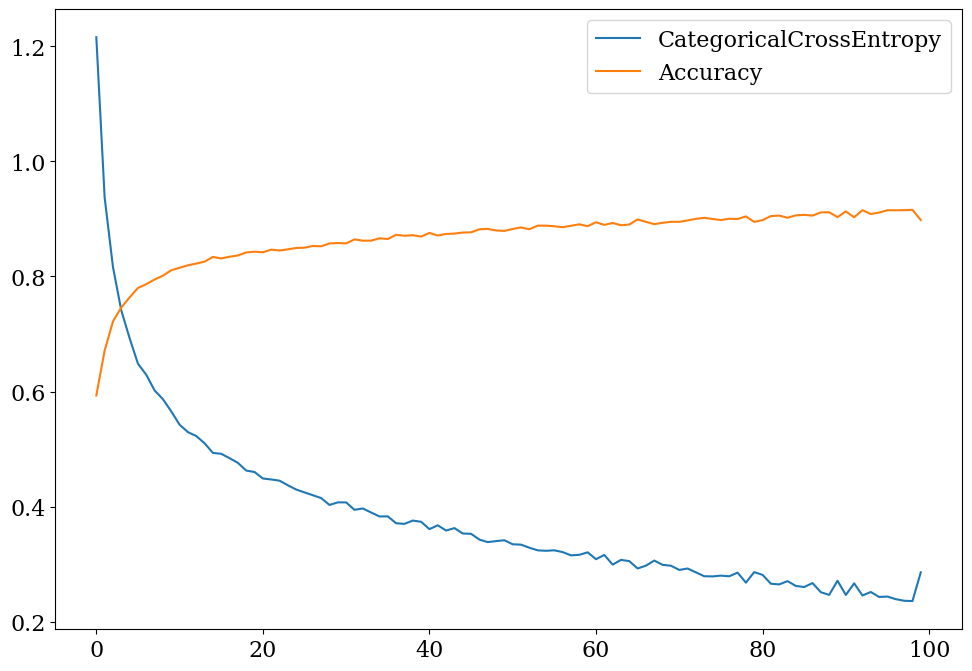

In [16]:
history_df = pd.DataFrame(history)
history_df.plot(subplots=False)
plt.tight_layout()

## Predictions

The module has a `predict` method to make predictions.

In [17]:
y_pred = model.predict(X)

The predictions are one-hot encoded. You can use `numpy.argmax` to get the class with the highest probability.

In [18]:
y_pred = np.argmax(y_pred, axis=0)
y_pred[:10]

array([0, 1, 2, 2, 3, 0, 8, 2, 5, 0])